In [6]:
# In[1]: Imports and basic settings
!pip install matplotlib numpy

import matplotlib.pyplot as plt
import numpy as np

# Use a clean style
plt.style.use("default")

# Define a simple, professional color palette
colors = {
    "sprint1": "#1f77b4",  # blue
    "sprint2": "#2ca02c",  # green
    "sprint3": "#ff7f0e",  # orange
    "velocity": "#9467bd",  # purple
    "cumulative": "#d62728",  # red
    
}

# Higher DPI for sharper images (good for Wiki export)
plt.rcParams["figure.dpi"] = 120
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["font.size"] = 11


You should consider upgrading via the 'c:\Users\aliva\Desktop\Practice\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl (12.9 MB)


In [7]:
# In[2]: Data definition based on your Agile Metrics

# Sprint 1 (03.11–10.11)
s1_days = ["03.11", "04.11", "05.11", "06.11", "07.11", "08.11", "09.11", "10.11"]
s1_remaining = [23, 20, 17, 15, 12, 8, 5, 0]

# Sprint 2 (11.11–24.11)
s2_days = ["11.11", "12.11", "13.11", "14.11", "15.11", "16.11", "17.11", 
           "18.11", "19.11", "20.11", "21.11", "22.11", "23.11", "24.11"]
s2_remaining = [22, 20, 18, 18, 15, 14, 14, 10, 7, 5, 3, 1, 0, 0]

# Sprint 3 (25.11–12.12)
s3_days = ["25.11", "26.11", "27.11", "28.11", "29.11", "30.11", "01.12",
           "02.12", "03.12", "04.12", "05.12", "06.12", "07.12", "08.12",
           "09.12", "10.12", "11.12", "12.12"]
s3_remaining = [23, 22, 20, 20, 18, 15, 15, 13, 10, 8, 6, 4, 3, 2, 1, 0, 0, 0]

# Velocity data
sprints = ["Sprint 1", "Sprint 2", "Sprint 3"]
velocity_planned = [23, 22, 23]
velocity_completed = [23, 22, 23]  # all completed

# Cumulative progress
cumulative = [23, 45, 68]


In [8]:
# In[3]: Helper function for a nice burndown chart

def plot_burndown(days, remaining_sp, title, color, filename=None):
    x = np.arange(len(days))
    
    plt.figure()
    plt.plot(x, remaining_sp, marker="o", linestyle="-", color=color, linewidth=2, label="Remaining SP")
    plt.fill_between(x, remaining_sp, alpha=0.1, color=color)
    
    # Ideal line from first to last (straight burn)
    ideal = np.linspace(remaining_sp[0], 0, len(days))
    plt.plot(x, ideal, linestyle="--", color="#7f7f7f", linewidth=1.5, label="Ideal line")
    
    plt.xticks(x, days, rotation=45, ha="right")
    plt.xlabel("Date")
    plt.ylabel("Remaining Story Points")
    plt.title(title)
    plt.grid(alpha=0.3, linestyle="--")
    plt.legend()
    plt.tight_layout()
    
    if filename:
        plt.savefig(filename, bbox_inches="tight")
    plt.show()


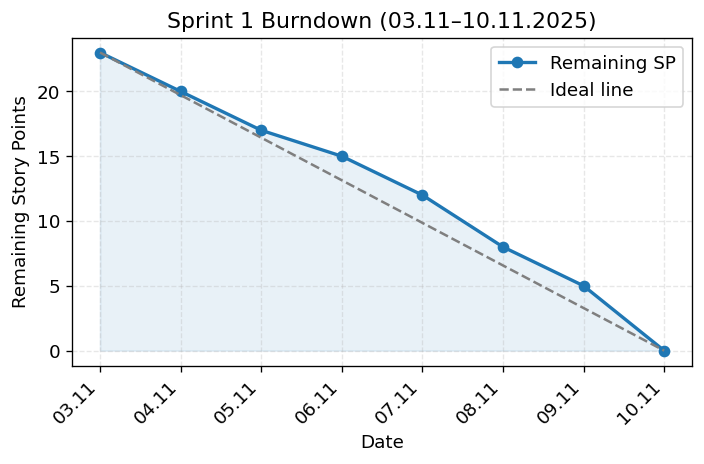

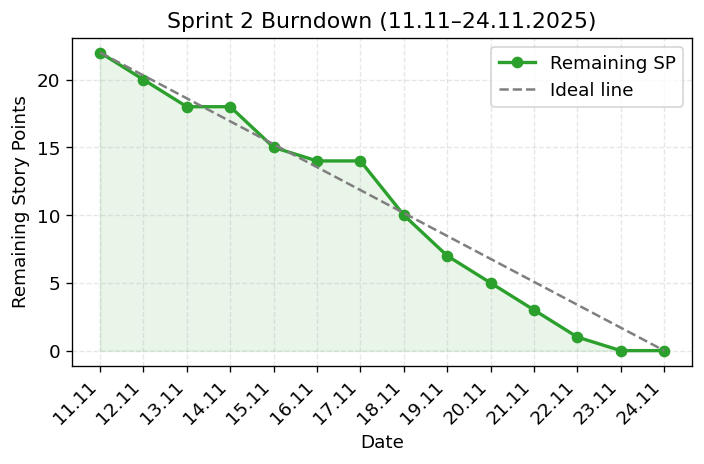

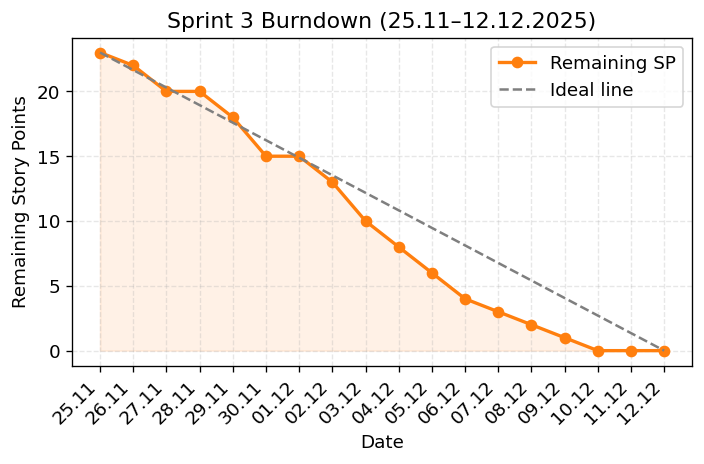

In [9]:
# In[4]: Plot burndown charts for all three sprints

plot_burndown(
    days=s1_days,
    remaining_sp=s1_remaining,
    title="Sprint 1 Burndown (03.11–10.11.2025)",
    color=colors["sprint1"],
    filename="sprint1_burndown.png",
)

plot_burndown(
    days=s2_days,
    remaining_sp=s2_remaining,
    title="Sprint 2 Burndown (11.11–24.11.2025)",
    color=colors["sprint2"],
    filename="sprint2_burndown.png",
)

plot_burndown(
    days=s3_days,
    remaining_sp=s3_remaining,
    title="Sprint 3 Burndown (25.11–12.12.2025)",
    color=colors["sprint3"],
    filename="sprint3_burndown.png",
)


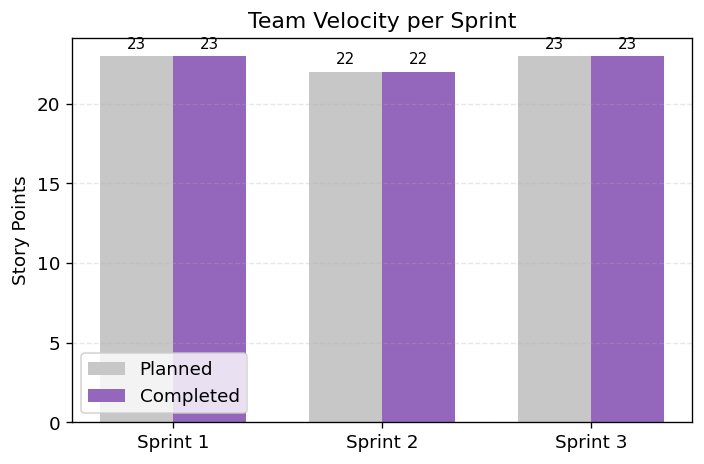

In [10]:
# In[5]: Velocity bar chart

x = np.arange(len(sprints))
width = 0.35

plt.figure()
plt.bar(x - width/2, velocity_planned, width, label="Planned", color="#c7c7c7")
plt.bar(x + width/2, velocity_completed, width, label="Completed", color=colors["velocity"])

for i, v in enumerate(velocity_planned):
    plt.text(x[i] - width/2, v + 0.3, str(v), ha="center", va="bottom", fontsize=9)
for i, v in enumerate(velocity_completed):
    plt.text(x[i] + width/2, v + 0.3, str(v), ha="center", va="bottom", fontsize=9)

plt.xticks(x, sprints)
plt.ylabel("Story Points")
plt.title("Team Velocity per Sprint")
plt.grid(axis="y", alpha=0.3, linestyle="--")
plt.legend()
plt.tight_layout()
plt.savefig("velocity_sprints.png", bbox_inches="tight")
plt.show()


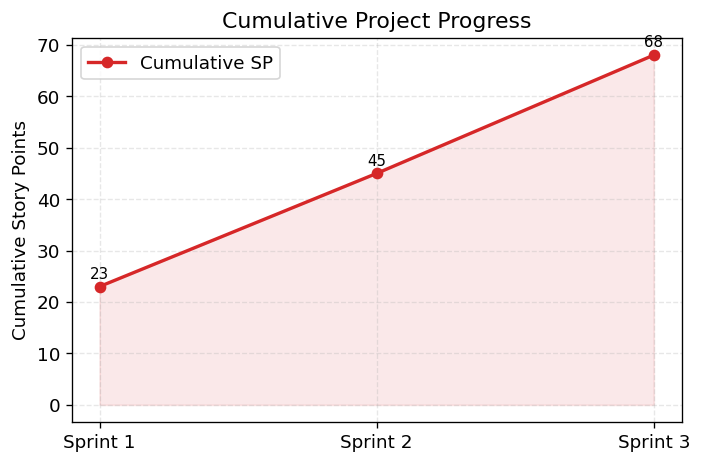

In [11]:
# In[6]: Cumulative progress chart

x = np.arange(len(sprints))

plt.figure()
plt.plot(x, cumulative, marker="o", linestyle="-", color=colors["cumulative"], linewidth=2, label="Cumulative SP")
plt.fill_between(x, cumulative, alpha=0.1, color=colors["cumulative"])

for i, v in enumerate(cumulative):
    plt.text(x[i], v + 1, str(v), ha="center", va="bottom", fontsize=9)

plt.xticks(x, sprints)
plt.ylabel("Cumulative Story Points")
plt.title("Cumulative Project Progress")
plt.grid(alpha=0.3, linestyle="--")
plt.legend()
plt.tight_layout()
plt.savefig("cumulative_progress.png", bbox_inches="tight")
plt.show()
